In [1]:
'''
Standard things to import...
'''
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits

In [2]:
'''
Lets import some other new things!
'''

import matplotlib # going to use this to change some settings (next cell)

from matplotlib.colors import LogNorm # this lets us scale color outputs using Log instead of Linear

import matplotlib.cm as cm # this gives access to the standard colormaps (besides rainbow)

In [3]:
'''
this is how you can change the default properties of plot text
Search Goolge for more examples of changing rcParams to get other fonts, styles, etc
'''
matplotlib.rcParams.update({'font.size':11}) 
matplotlib.rcParams.update({'font.family':'serif'})

In [10]:
# remember how to open FITS tables from last week (or go back and review)
dfile = 'data/I239_hip_main_small.fit'

# our data comes from the HIPPARCOS mission: http://adsabs.harvard.edu/abs/1997ESASP1200.....E
# I used Vizier to make a smaller version of the table for ease of reading

hdulist2 = fits.open(dfile)
hdulist2.info() # print the extensions

Filename: data/I239_hip_main_small.fit
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      57   ()      
  1  I_239_hip_main    1 BinTableHDU     62   118218R x 10C   [J, E, D, D, E, E, E, E, E, E]   


In [11]:
tbl = hdulist2[1].data # get the data from the 2nd extension
hdulist2.close() # close the file
tbl.columns # print the columns available (can be called by name!)

ColDefs(
    name = 'HIP'; format = 'J'; disp = 'I6'
    name = 'Vmag'; format = 'E'; unit = 'mag'; disp = 'F5.2'
    name = 'RA_ICRS_'; format = 'D'; unit = 'deg'; disp = 'F12.8'
    name = 'DE_ICRS_'; format = 'D'; unit = 'deg'; disp = 'F12.8'
    name = 'Plx'; format = 'E'; unit = 'mas'; disp = 'F7.2'
    name = 'e_Plx'; format = 'E'; unit = 'mas'; disp = 'F6.2'
    name = 'B-V'; format = 'E'; unit = 'mag'; disp = 'F6.3'
    name = 'e_B-V'; format = 'E'; unit = 'mag'; disp = 'F6.3'
    name = 'V-I'; format = 'E'; unit = 'mag'; disp = 'F5.2'
    name = 'e_V-I'; format = 'E'; unit = 'mag'; disp = 'F5.2'
)

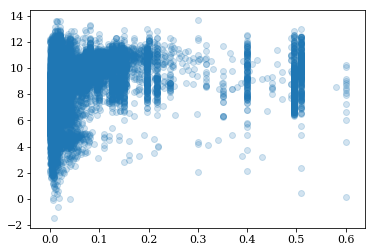

In [15]:
# you can make plots by calling columns by name!
plt.scatter(tbl['e_B-V'], tbl['Vmag'], alpha=0.2)

You'll need to compute the absolute magnitude of the stars. Recall the formula:

$M_v = -5 \log_{10}(1/\pi) + 5 + m_V$

Where $\pi$ is the parallax in arcseconds, $m_V$ is the apparent magnitude in the V-band

In [52]:
'''
Find stars with "good" data
I required errors for B-V greater than 0 and less than or equal to 0.05mag
I required errors on parallax to be greater than 0 and less than or equal to 5

Finally, I required the absolute magnitudes to be real numbers (no Nulls, NaN's, Infs, etc)
'''

# here is most of what you need. Finish it!
ok = np.where((tbl['e_B-V'] <= 0.05) &
              (tbl['e_Plx'] > 0) & (tbl['e_Plx'] <5) &
              np.isfinite(tbl['Vmag']))
Mabsolute = -5*np.log10(1000/(tbl['Plx'][ok]))+5+(tbl['Vmag'][ok])
print(Mabsolute)

[ 1.8450174  5.9722214 -1.1464677 ...  1.0848503  5.618767  -0.8099098]


/Users/scoggim/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in less_equal
  # This is added back by InteractiveShellApp.init_path()
/Users/scoggim/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in greater
  # This is added back by InteractiveShellApp.init_path()
/Users/scoggim/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in less
  # This is added back by InteractiveShellApp.init_path()
/Users/scoggim/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in true_divide
  del sys.path[0]
/Users/scoggim/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in log10
  del sys.path[0]


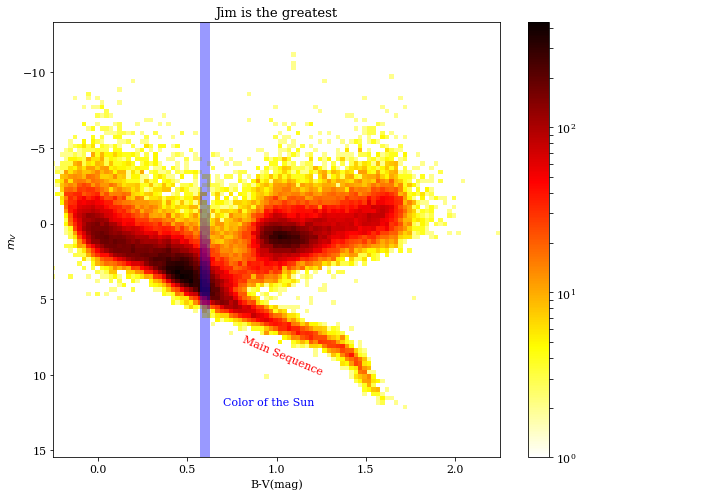

In [90]:
plt.figure(figsize=(10,8)) 


# here's a freebie: I used a 10x8 figsize
x=tbl['B-V'][ok]
y = Mabsolute
okagain = np.where(np.isfinite(x)&np.isfinite(y))
x = x[okagain]
y = y[okagain]
size=np.size(x)

plt.hist2d(x, y, 
           bins=(150,100), # set the number of bins in the X and Y direction. You'll have to guess what I used
           norm=LogNorm(), # scale the colors using log, not linear (default)
           cmap = cm.hot_r) # change the colormap

plt.gca().invert_yaxis()
plt.title("Jim is the greatest")
plt.xlim(-0.25,2.25)
# the B-V color of the Sun is 0.635 mag
plt.annotate('Color of the Sun', (0.7,12), color='blue')
plt.annotate('Main Sequence', (0.8,7.8), color='red', rotation = -23)
plt.plot([0.6,0.6], [17,-19], alpha = 0.4, c='blue', lw=10)

# use plt.annotate to put words on the plot, set their colors, fontsizes, and rotation

plt.ylabel('$m_{V}$') # you can put (some) LaTeX math in matplotlib titles/labels
plt.xlabel("B-V(mag)")
cb = plt.colorbar() # make a colorbar magically appear



# more freebies: this is the exact resolution and padding I used to make the figure file
plt.savefig('HEREYAGO.png', 
            dpi=300, # set the resolution
            bbox_inches='tight', # make the figure fill the window size
            pad_inches=0.5) # give a buffer so text doesnt spill off side of plot